In [ ]:
%pip install scikit-learn
%pip install xgboost

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# โหลดข้อมูล
data = pd.read_csv("spotify_youtube_data_final.csv")

# เลือกคุณลักษณะ
features = ['danceability%', 'positiveness%', 'energy%', 
            'acousticness%', 'views', 'likes']
target = 'streams'

X = data[features].fillna(0)
y = data[target]

# แบ่งข้อมูล train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# โมเดล
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

results = {}

# ฝึกและทดสอบโมเดล
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

#model.fit(X_train, y_train) - ฝึกโมเดลด้วยข้อมูลฝึก
# y_pred = model.predict(X_test) - ทำนายค่าผลลัพธ์จากข้อมูลทดสอบ
# mae = mean_absolute_error(y_test, y_pred) - คำนวณค่า MAE ซึ่งบ่งชี้ความแตกต่างเฉลี่ยระหว่างค่าจริงและค่าทำนาย
# rmse = np.sqrt(mean_squared_error(y_test, y_pred)) - คำนวณค่า RMSE ซึ่งเป็นการวัดค่าความเบี่ยงเบนเฉลี่ยที่ถูกยกกำลังสอง
# r2 = r2_score(y_test, y_pred) - คำนวณค่า R² ซึ่งบ่งชี้ว่าการทำนายของโมเดลสามารถอธิบายข้อมูลได้มากน้อยแค่ไหน

# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Linear Regression: {'MAE': 5030912.306505009, 'RMSE': 9285981.91243523, 'R2': 0.04082090883530831}
Random Forest: {'MAE': 4743994.49898499, 'RMSE': 9495237.892882058, 'R2': -0.002895623993047769}
XGBoost: {'MAE': 4983985.632845954, 'RMSE': 10328846.2790824, 'R2': -0.18671836786588503}


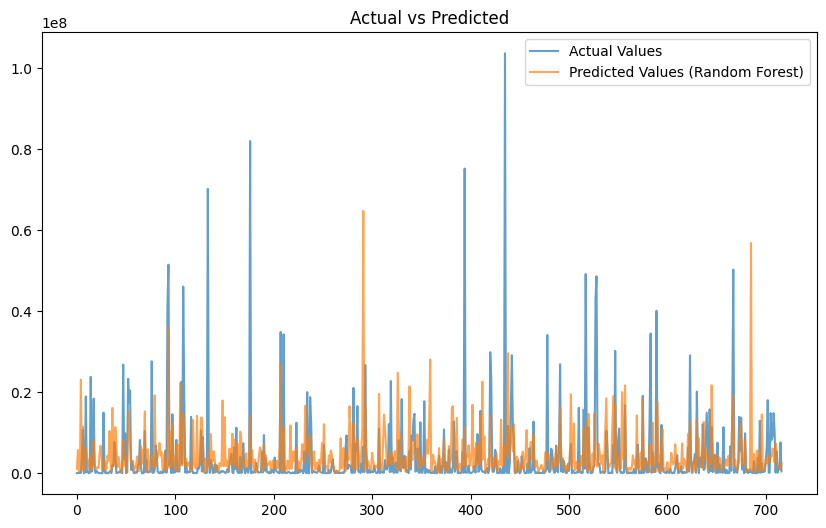

In [2]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Random Forest"].predict(X_test), label='Predicted Values (Random Forest)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

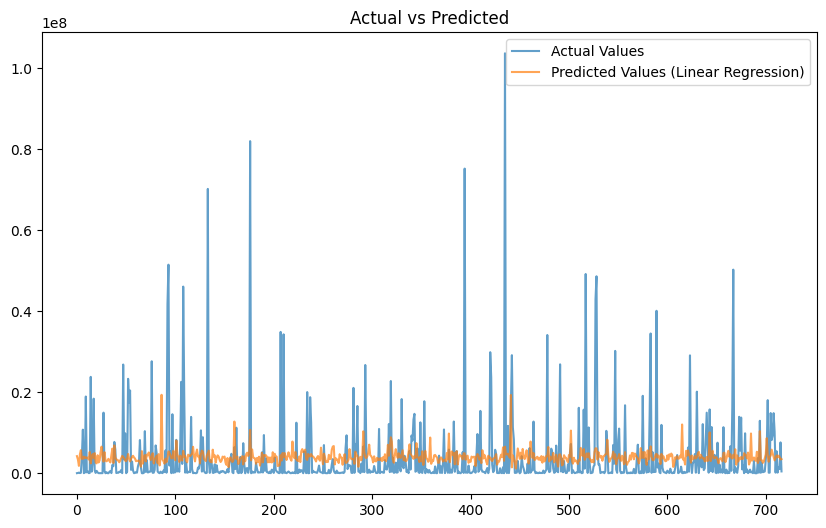

In [3]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Linear Regression"].predict(X_test), label='Predicted Values (Linear Regression)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

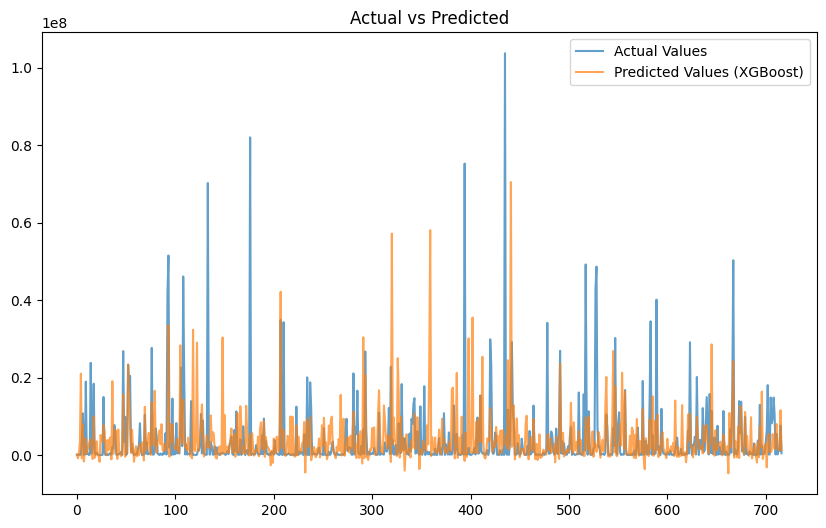

In [4]:
# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["XGBoost"].predict(X_test), label='Predicted Values (XGBoost)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

Linear Regression: {'MAE': 5020464.450690376, 'RMSE': 9243981.994147008, 'R2': 0.04947790161321808}
Random Forest: {'MAE': 4642325.838955602, 'RMSE': 9228248.994834151, 'R2': 0.05271067238352112}
XGBoost: {'MAE': 4907047.168124019, 'RMSE': 9501598.51269479, 'R2': -0.004239702872613549}


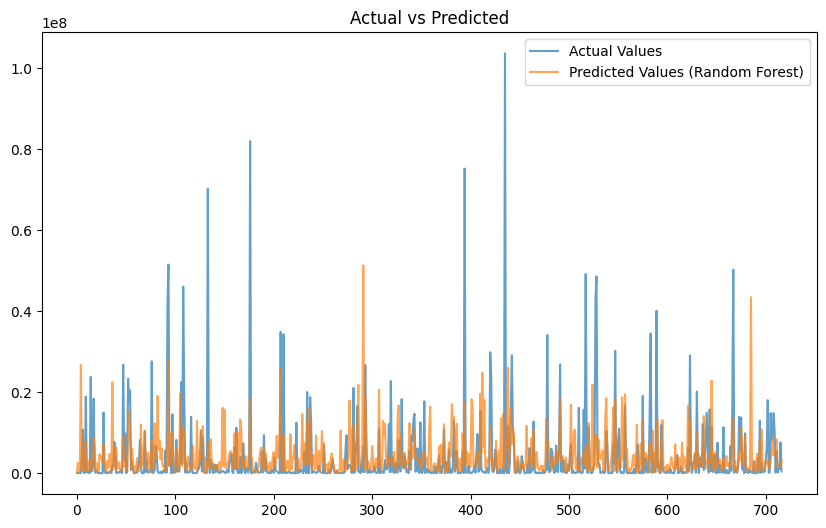

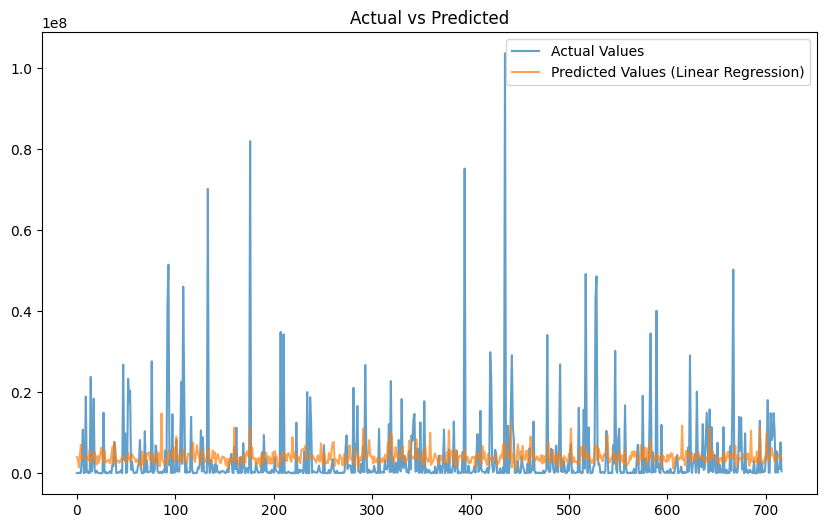

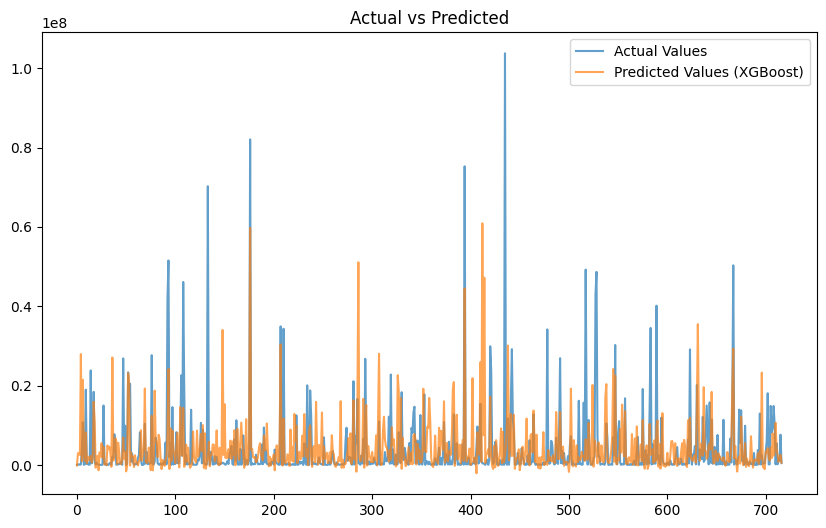

In [8]:
#ทำ scaling หรือ feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# โหลดข้อมูล
data = pd.read_csv("spotify_youtube_data_final.csv")

# การทำ Feature Engineering
# เพิ่มฟีเจอร์ใหม่
data['views_per_like'] = data['views'] / (data['likes'] + 1)  # ป้องกันการหารด้วย 0
data['views_times_likes'] = data['views'] * data['likes']

# เลือกฟีเจอร์และ target
features = ['danceability%', 'positiveness%', 'energy%', 
            'acousticness%', 'views', 'likes', 'views_per_like', 'views_times_likes']
target = 'streams'

X = data[features].fillna(0)  # เติมค่า NaN ด้วย 0
y = data[target]

# การทำ scaling ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แบ่งข้อมูล train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# สร้างโมเดล
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

results = {}

# ฝึกและทดสอบโมเดล
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# แสดงผลลัพธ์
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


# กราฟแสดงความสัมพันธ์ระหว่างค่าจริงและค่าคาดการณ์  
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Random Forest"].predict(X_test), label='Predicted Values (Random Forest)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["Linear Regression"].predict(X_test), label='Predicted Values (Linear Regression)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7)
plt.plot(models["XGBoost"].predict(X_test), label='Predicted Values (XGBoost)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

